## Import Data

In [1]:
import matplotlib.pylab as plt
import numpy as np
from tqdm.notebook import trange
import json
from tqdm import tnrange

In [2]:
%run "Kyber Leakage Model.ipynb"

0x1df082
0xff36a97e
0xfbb90000
0xffdacea2
0x5622da
0x5622da
0x1c4ef26
0xff7b0000
0x834ba2
0x3d6ee5e
0xff9e0000
0xff9eff7b
2226
0b00000000000000000000100010110010
0b11111111111111111111011101001110


In [14]:
#[[plaintext, cipher, tracearray], ...]
data = np.load('dataNewTrigger.npy', allow_pickle=True)
print(data[0][0])

[32, 195, 29, 129, 121, 202, 84, 235, 183, 73, 213, 254, 228, 63, 202, 156, 50, 51, 148, 35, 72, 216, 223, 226, 253, 185, 2, 188, 24, 143, 206, 39]


In [150]:
data_phase192 = np.load('data_phase192.npy', allow_pickle=True)

In [156]:
data_clkx2 = np.load('data_clkx2.npy', allow_pickle=True)

In [93]:
data_Trigger_low = np.load('data_trigger_low.npy', allow_pickle=True)
print(data_Trigger_low[0][0])

[241, 144, 50, 179, 87, 248, 201, 10, 173, 89, 32, 127, 247, 19, 148, 34, 235, 182, 86, 122, 235, 115, 143, 242, 11, 39, 49, 174, 108, 24, 144, 124]


In [91]:
data_falling_edge = np.load('data_falling_edge.npy', allow_pickle=True)
print(data_falling_edge[0][0])

[241, 144, 50, 179, 87, 248, 201, 10, 173, 89, 32, 127, 247, 19, 148, 34, 235, 182, 86, 122, 235, 115, 143, 242, 11, 39, 49, 174, 108, 24, 144, 124]


In [103]:
data_high = np.load('data_high.npy', allow_pickle=True)

In [109]:
data_low = np.load('data_low.npy', allow_pickle=True)

In [122]:
data_fetl = np.load('data_falling_edge_trigger_low.npy', allow_pickle=True)

## CPA Model

In [16]:
import numpy as np

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

In [4]:

maxcpa = [0] * 65536

trace_array = [x[2] for x in data]
# we don't need to redo the mean and std dev calculations 
# for each key guess
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)

for kguess in tnrange(0, 2**16):
    hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), kguess, 0) for d in data]]).transpose()
    #print(ctPoly(d[1], 0))
    #print(getHammingSteg1(ctPoly(d[1], 0), kguess, 0))
    #print(hws)
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = correlation/(o_t*o_hws)
    maxcpa[kguess] = max(abs(cpaoutput))
    

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)
# ###################
# END SOLUTION
# ###################
print("Key guess: ", hex(guess))
print("Correlation: ", guess_corr)
print("Fasit", hex(0x77e), "corr:", maxcpa[0x77e])

/var/folders/7s/v6w1gfl95vng5ycdwyfdkmr00000gq/T/ipykernel_1690/894505924.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for kguess in tnrange(0, 2**16):


  0%|          | 0/65536 [00:00<?, ?it/s]

/var/folders/7s/v6w1gfl95vng5ycdwyfdkmr00000gq/T/ipykernel_1690/894505924.py:18: RuntimeWarning: invalid value encountered in divide
  cpaoutput = correlation/(o_t*o_hws)


<IPython.core.display.Javascript object>


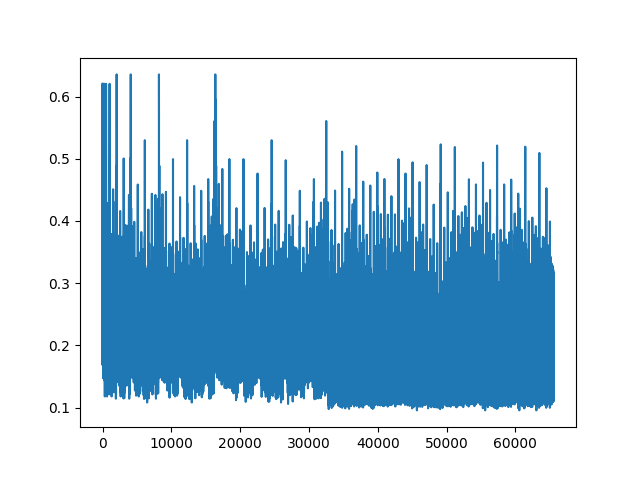

In [38]:
%matplotlib notebook

plt.plot(maxcpa_steg1)

## Steg 2

In [ ]:
keys = [0x77e] #Sorted list of keys after correlation in part 1
maxcpa = [0] * len(keys)
for i in range(len(keys)):
    maxcpa[i] = [0] * 65536
    for kguess in tnrange(0, 2**16):
        hws = np.array([[getHammingSteg2(ctPoly(d[1], 0), key[i], kguess, 0) for d in data]]).transpose()

        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        covariance = cov(trace_array, t_bar, hws, hws_bar)
        correalation = covariance/(o_t*o_hws)
        maxcpa[i][kguess] = max(abs(correalation))

### Riktig key del 1 iterasjon 0

<IPython.core.display.Javascript object>


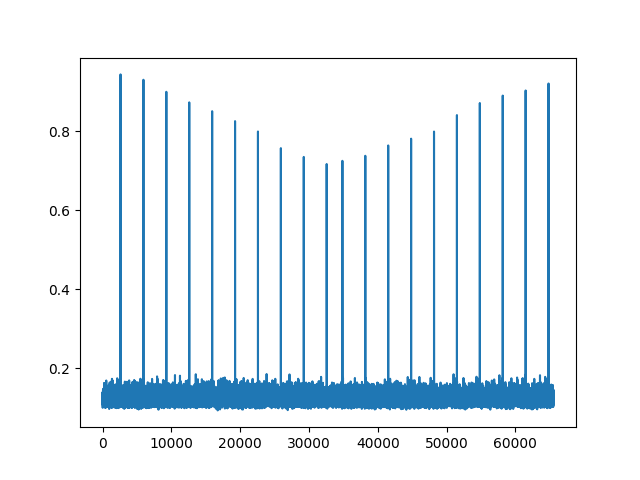

In [39]:
%matplotlib notebook

plt.plot(maxcpa_steg2)

### Riktig key del 1 iterasjon 16

In [13]:
print("del 1 key:", hex(getTrueSk(sk, 16)[1]) ,getTrueSk(sk, 16)[1])
print("del 2 key:", hex(getTrueSk(sk, 16)[0]), getTrueSk(sk, 16)[0])

del 1 key: 0x3b4 948
del 2 key: 0x175 373


<IPython.core.display.Javascript object>


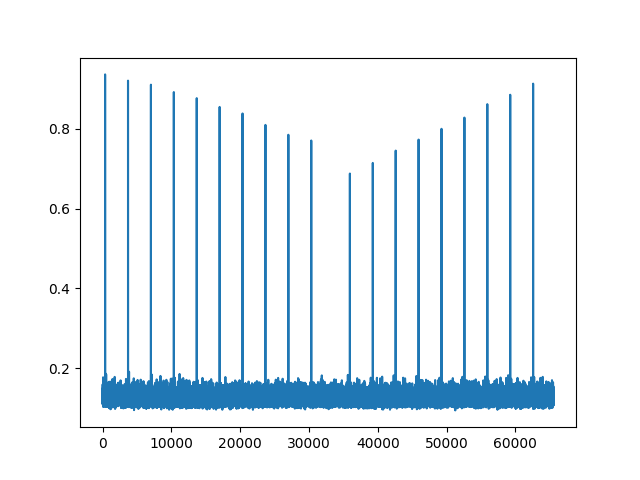

In [6]:
%matplotlib notebook

plt.plot(maxcpa_steg2_i16)

### Feil key del 1 iterasjon 0

<IPython.core.display.Javascript object>


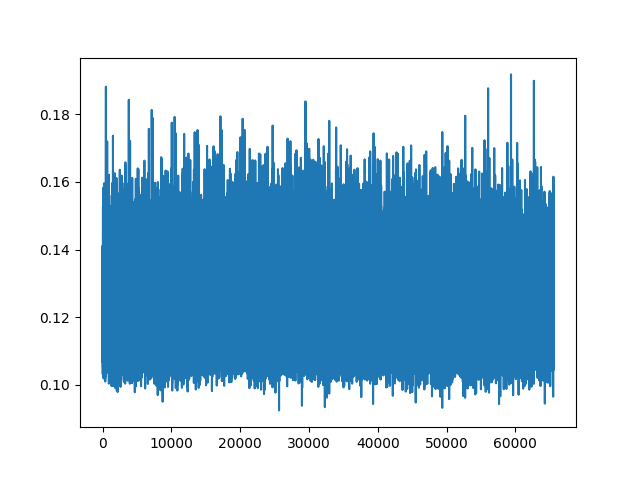

In [5]:
%matplotlib notebook

plt.plot(maxcpa_steg2_i0_feil)

### Saving data

In [32]:
0x77e

1918

In [55]:
with open("maxcpa20000", "w") as fp:
    json.dump(maxcpa, fp)

### Loading data

In [23]:
with open("maxcpa20000", "r") as fp:
    maxcpa = json.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: 'maxcpa20000'

In [19]:
with open("maxcpa-steg1", "r") as fp:
    maxcpa_steg1 = json.load(fp)

In [28]:
with open("maxcpa-steg2", "r") as fp:
    maxcpa_steg2 = json.load(fp)

In [3]:
with open("maxcpa-steg2-i16", "r") as fp:
    maxcpa_steg2_i16 = json.load(fp)

In [4]:
with open("maxcpa-steg2-i0-feil", "r") as fp:
    maxcpa_steg2_i0_feil = json.load(fp)

## Testing data

### Obtaining top key guesses

Selv om lavere correalation gir data med flere dekrypteringer bedre korrelasjon i forhold til andre

In [36]:
guesses = []
for i in range(KYBER_Q):
    if maxcpa_steg1[i]>=.43:
        print(bin(i), maxcpa_steg1[i])
        guesses.append(i)

0b1 0.6206615292375284
0b10 0.6206615292375284
0b100 0.6206615292375284
0b1000 0.6206615292375284
0b10000 0.6206615292375284
0b100000 0.6206615292375284
0b1000000 0.6206615292375284
0b10000000 0.6206615292375284
0b10000001 0.4888006394224837
0b100000000 0.6206615292375284
0b100000001 0.502103940485052
0b100000010 0.4888006394224837
0b1000000000 0.6206615292375284
0b1000000001 0.568524265301428
0b1000000010 0.502103940485052
0b1000000100 0.4888006394224837
0b1110111111 0.43149708583420066
0b10000000000 0.6206615292375284
0b10000000001 0.5956306967549965
0b10000000010 0.568524265301428
0b10000000100 0.502103940485052
0b10000001000 0.4888006394224837
0b11000000001 0.4510857176760064
0b11101111110 0.43149708583420066
0b100000000000 0.6206615292375284
0b100000000001 0.635782399606562
0b100000000010 0.5956306967549965
0b100000000011 0.46304202364969277
0b100000000100 0.568524265301428
0b100000001000 0.502103940485052
0b100000010000 0.4888006394224837
0b110000000001 0.5005301253368079
0b11000

In [26]:
print(len(guesses))

976


In [12]:
print(hex(maxcpa_steg2_i16.index(max(maxcpa_steg2_i16))))

0x175


In [46]:
print(maxcpa_steg2_i16[0x175], maxcpa_steg2[0xfd35])

0.9437365140133332 0.920713407675079


#### Cheking correlation number for all subkeys Steg1

In [28]:
trace_array = [x[2] for x in data]
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)

correalationForSubkeys_steg1 = []

for i in tnrange(KYBER_N // 4):
    tmp = getTrueSk(sk, i)
    
    #double 1
    hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), tmp[1], i) for d in data]]).transpose()
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = abs(correlation/(o_t*o_hws))
    corr = [cpaoutput.argmax(), max(cpaoutput)]
    correalationForSubkeys_steg1.append(corr)
    print(corr)
    
    
    #double 2
    hws = np.array([[getHammingSteg12(ctPoly(d[1], 0), tmp[3], i) for d in data]]).transpose()
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = abs(correlation/(o_t*o_hws))
    corr = [cpaoutput.argmax(), max(cpaoutput)]
    correalationForSubkeys_steg1.append(corr)
    print(corr)
    

C:\Users\erlen\AppData\Local\Temp\ipykernel_4008\2982539074.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(KYBER_N // 4):


  0%|          | 0/64 [00:00<?, ?it/s]

[233, 0.43149708583420066]
[285, 0.39457298405550234]
[609, 0.38599021219318147]
[663, 0.38569668474410246]
[985, 0.388520621304478]
[1038, 0.27392118569700696]
[1362, 0.375097111710101]
[1413, 0.42596525678044017]
[1738, 0.352770195019823]
[1789, 0.3242615088130053]
[2113, 0.3850061985227507]
[2166, 0.37004813999861336]
[2489, 0.3256736866586791]
[2544, 0.28633337472844483]
[2865, 0.3591984527850865]
[2918, 0.37145968523330947]
[3241, 0.42696894602569607]
[3293, 0.38610092735104257]
[3617, 0.39626007478388536]
[3605, 0.33853686928169746]
[3995, 0.4121146299035533]
[4045, 0.3574688878406556]
[4369, 0.3921040486944322]
[4422, 0.3883507394485847]
[4746, 0.38654616345502585]
[4799, 0.29183538313449486]
[5123, 0.3736510312195093]
[5109, 0.45031874740389766]
[5497, 0.4487099669052378]
[5550, 0.3412682004371167]
[5873, 0.31492952662427043]
[5927, 0.3278362604592996]
[6249, 0.38342052257602904]
[6302, 0.37670978340424066]
[6626, 0.41963871659567437]
[6677, 0.3237178302915266]
[7001, 0.3870008

#### Cheking correlation number for all subkeys Steg2

In [18]:
trace_array = [x[2] for x in data]
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)

correalationForSubkeys_steg2 = []

for i in tnrange(KYBER_N // 4):
    tmp = getTrueSk(sk, i)
    
    #double 1
    hws = np.array([[getHammingSteg2(ctPoly(d[1], 0), tmp[1], tmp[0], i) for d in data]]).transpose()
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = abs(correlation/(o_t*o_hws))
    corr = [cpaoutput.argmax(), max(cpaoutput)]
    correalationForSubkeys_steg2.append(corr)
    print(corr, "del1:", tmp[1], "del2:", tmp[0])
    
    
    #double 2
    hws = np.array([[getHammingSteg22(ctPoly(d[1], 0), tmp[3], tmp[2], i) for d in data]]).transpose()
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = abs(correlation/(o_t*o_hws))
    corr = [cpaoutput.argmax(), max(cpaoutput)]
    correalationForSubkeys_steg2.append(corr)
    print(corr, "del1:", tmp[3], "del2:", tmp[2])
    

C:\Users\erlen\AppData\Local\Temp\ipykernel_1788\768016559.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(KYBER_N // 4):


  0%|          | 0/64 [00:00<?, ?it/s]

[278, 0.9437365140133332] del1: 1918 del2: 2614
[326, 0.9219972735256788] del1: 183 del2: 1976
[654, 0.9366428041632845] del1: 3066 del2: 1387
[702, 0.9261049460261143] del1: 660 del2: 2997
[1030, 0.9379270031610119] del1: 211 del2: 167
[1078, 0.9254903196465704] del1: 3186 del2: 429
[1406, 0.9492523801362708] del1: 1914 del2: 2069
[1454, 0.9305790270065704] del1: 2036 del2: 613
[1782, 0.9391738548057808] del1: 455 del2: 2029
[1830, 0.9228429303390601] del1: 2189 del2: 3040
[2158, 0.9437929659174418] del1: 1714 del2: 1184
[2206, 0.9323155026474924] del1: 2415 del2: 228
[2534, 0.9371264782830807] del1: 781 del2: 675
[2582, 0.9236419482535466] del1: 2205 del2: 55
[2910, 0.9443599028581636] del1: 2323 del2: 2289
[2958, 0.9317717619586756] del1: 2028 del2: 2827
[3286, 0.9462611008197163] del1: 1249 del2: 1699
[3337, 0.9243266044949668] del1: 1925 del2: 3187
[3662, 0.9469884384889571] del1: 2019 del2: 2862
[3710, 0.9253197684538447] del1: 1282 del2: 2569
[4038, 0.9500797292105816] del1: 216

In [30]:
diff = []
for i in range(2*64):
    diff.append(correalationForSubkeys_steg2[i][0]-correalationForSubkeys_steg1[i][0])
    
print(diff)

[45, 41, 45, 39, 45, 40, 44, 41, 44, 41, 45, 40, 45, 38, 45, 40, 45, 44, 45, 105, 43, 41, 45, 40, 44, 39, 43, 105, 45, 44, 45, 39, 45, 40, 44, 41, 45, 40, 44, 41, 45, 39, 45, 105, 45, 40, 44, 44, 48, 41, 44, 39, 45, 41, 41, 41, 45, 44, 42, 41, 45, 38, 44, 40, 45, 39, 45, 39, 45, 40, 48, 41, 45, 38, 44, 41, 44, 41, 45, 39, 45, 40, 44, 40, 44, 39, 45, 40, 45, 40, 45, 40, 44, 41, 43, 41, 45, 40, 45, 41, 45, 41, 45, 38, 45, 40, 2709, 9711, -13356, 7131, 15202, 18783, 244, 12254, 3912, 1311, -1417, -8793, 2985, -6159, -12333, -10285, -10084, -10287, 749, 7719, -7319, -4082]


In [158]:
for i in range(len(correalationForSubkeys)):
    print(correalationForSubkeys[i],  correalationForSubkeys_phase192[i], correalationForSubkeys_clkx2[i])

[233, 0.43149708583420066] [234, 0.4399680132763816] [233, 0.44629974514934645]
[285, 0.39457298405550234] [288, 0.4080110850657796] [285, 0.41308615737388654]
[609, 0.38599021219318147] [611, 0.3822158305389737] [610, 0.3678157642548171]
[663, 0.38569668474410246] [663, 0.36950403573953017] [662, 0.34956249655186766]
[985, 0.388520621304478] [985, 0.5087882914831255] [986, 0.5009431572758305]
[1038, 0.27392118569700696] [1037, 0.3390776480621453] [1040, 0.3399947840627415]
[1362, 0.375097111710101] [1361, 0.40929797175830196] [1362, 0.39117657568695247]
[1413, 0.42596525678044017] [1414, 0.5147832809496796] [1415, 0.5186400682314697]
[1738, 0.352770195019823] [1738, 0.34696765702896953] [1739, 0.38071251100065606]
[1789, 0.3242615088130053] [1789, 0.40122833959498494] [1789, 0.397147185572703]
[2113, 0.3850061985227507] [2115, 0.4182366092031236] [2114, 0.4052982532378648]
[2166, 0.37004813999861336] [2167, 0.3431455509285871] [2165, 0.3512266700791646]
[2489, 0.3256736866586791] [248

In [137]:
print(correalationForSubkeys[0], correalationForSubkeys2[0], correalationForSubkeys3[0])

[233, 0.43149708583420066] [234, 0.4349447404003588] [233, 0.45435027421442187]


### Testing correlation equations 
by inserting known correalation

In [25]:
trace_array = [x[2] for x in data]
hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), 0x77e, 0) for d in data]]).transpose()

for i in range(1000):
    trace_array[i][5000] = hws[i] #Known correlation of 1

t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)
hws_bar = mean(hws)
o_hws = std_dev(hws, hws_bar)

correlation = cov(trace_array, t_bar, hws, hws_bar)
cpaoutput = correlation/(o_t*o_hws)

print(np.nanmax(cpaoutput))

0.9999999999999993


<IPython.core.display.Javascript object>


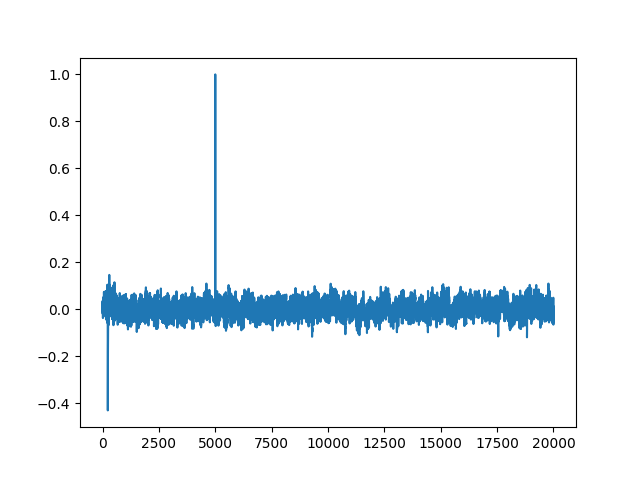

In [26]:
%matplotlib notebook

plt.plot(cpaoutput)

## Testing leakage model
Mot fasit som burde få høy correalation

In [14]:
%run "Kyber Leakage Model.ipynb"

0x1df082
0xff36a97e
0xfbb90000
0xffdacea2
0x5622da
0x5622da
0x1c4ef26
0xff7b0000
0x834ba2
0x3d6ee5e
0xff9e0000
0xff9eff7b
2226
0b00000000000000000000100010110010
0b11111111111111111111011101001110


### Del 1

In [11]:
trace_array = [x[2] for x in data]
hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), 0x77e, 0) for d in data]]).transpose()

t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)
hws_bar = mean(hws)
o_hws = std_dev(hws, hws_bar)

correlation = cov(trace_array, t_bar, hws, hws_bar)
cpaoutput = correlation/(o_t*o_hws)

print(np.nanmax(abs(cpaoutput)))

0.43149708583420066


<IPython.core.display.Javascript object>


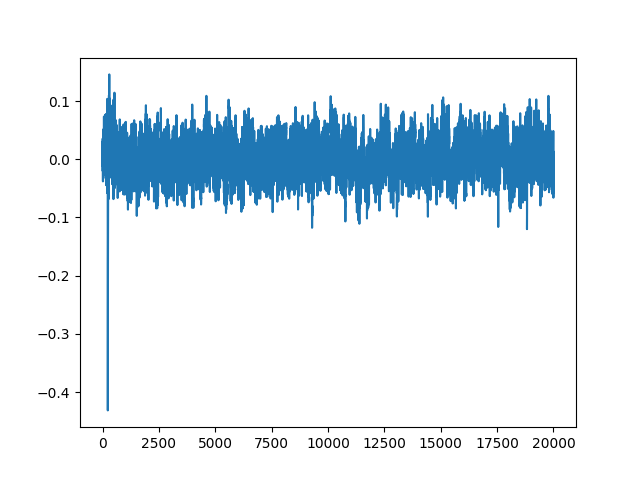

In [12]:
%matplotlib notebook

plt.plot(cpaoutput)

### Del 2

In [15]:
trace_array = [x[2] for x in data]
hws = np.array([[getHammingSteg2(ctPoly(d[1], 0), 0x77e, 0xa36, 0) for d in data]]).transpose()

t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)
hws_bar = mean(hws)
o_hws = std_dev(hws, hws_bar)

correlation = cov(trace_array, t_bar, hws, hws_bar)
cpaoutput = correlation/(o_t*o_hws)

print(np.nanmax(abs(cpaoutput)))

0.9437365140133332
